# Jeff Pinegar
jeffPinegar1@gmail.com <br>
717-982-0516<br>
## Challenge 20 - Unsupervised Machine Learing Myopia<br>

Due: Feb. 27, 2023<br>

---

In [59]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg   # https://pingouin-stats.org/build/html/index.html

---
# Data Preparation (25 points)

* Reads the csv into pandas (5 points)
* Previews the DataFrame (5 points)
* Removes the MYOPIC column from the dataset (5 points)
* Standardizes the dataset using a scaler (5 points)
* Names the resulting DataFrame X (5 points)

In [60]:
# Loading the preprocessed iris dataset
file_path = Path("./myopia.csv")
df_raw = pd.read_csv(file_path)
df_raw.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [61]:
# examine the data looking for problems (outliers, nulls, etc.)
df_raw.describe(include = 'all').round(3)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
count,618.000,618.000,618.000,618.000,618.000,618.000,618.000,618.000,618.000,618.000,618.000,618.000,618.000,618.000,618.000
mean,6.299,0.801,22.497,3.579,3.541,15.377,11.953,2.796,2.105,1.490,8.948,26.018,0.506,0.498,0.131
std,0.713,0.626,0.680,0.230,0.155,0.664,7.968,3.068,3.057,2.216,5.719,16.032,0.500,0.500,0.338
min,5.000,-0.699,19.900,2.772,2.960,13.380,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000
25%,6.000,0.456,22.040,3.424,3.436,14.930,6.000,0.000,0.000,0.000,4.250,15.000,0.000,0.000,0.000
50%,6.000,0.729,22.465,3.585,3.542,15.360,10.000,2.000,1.000,1.000,8.000,23.000,1.000,0.000,0.000
75%,6.000,1.034,22.970,3.730,3.640,15.840,16.000,4.000,3.000,2.000,12.000,34.000,1.000,1.000,0.000
max,9.000,4.372,24.560,4.250,4.112,17.300,45.000,20.000,30.000,15.000,31.000,101.000,1.000,1.000,1.000


In [62]:
# Pearson correlation Matrix of the raw data.  Notice that none of the independent variables have high correlations with Myopia.
df_raw.pcorr().round(3)

# There are problem with the data.  AL, ACD, LT and VCD are perfectly correlated. 

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
AGE,1.000,-0.048,0.065,-0.063,-0.068,-0.065,-0.026,-0.203,-0.168,0.298,-0.073,0.354,-0.060,-0.071,0.006
SPHEQ,-0.048,1.000,0.052,-0.056,-0.056,-0.054,-0.005,-0.046,0.044,0.019,-0.050,-0.042,-0.085,-0.106,-0.346
AL,0.065,0.052,1.000,1.000,1.000,1.000,0.014,0.052,0.043,-0.069,-0.012,-0.056,0.086,-0.010,0.010
ACD,-0.063,-0.056,1.000,1.000,-1.000,-1.000,-0.012,-0.052,-0.041,0.069,0.011,0.056,-0.085,0.010,-0.010
LT,-0.068,-0.056,1.000,-1.000,1.000,-1.000,-0.014,-0.052,-0.043,0.069,0.014,0.058,-0.086,0.009,-0.011
VCD,-0.065,-0.054,1.000,-1.000,-1.000,1.000,-0.013,-0.052,-0.042,0.069,0.013,0.056,-0.087,0.010,-0.010
SPORTHR,-0.026,-0.005,0.014,-0.012,-0.014,-0.013,1.000,0.032,-0.094,0.015,0.115,0.139,-0.058,0.018,-0.103
READHR,-0.203,-0.046,0.052,-0.052,-0.052,-0.052,0.032,1.000,0.095,0.812,-0.072,0.243,-0.034,-0.020,0.071
COMPHR,-0.168,0.044,0.043,-0.041,-0.043,-0.042,-0.094,0.095,1.000,0.472,0.107,0.157,0.034,0.019,0.019
STUDYHR,0.298,0.019,-0.069,0.069,0.069,0.069,0.015,0.812,0.472,1.000,0.182,-0.401,0.005,0.012,-0.069


In [63]:
# Same dataset as before
y = df_raw["MYOPIC"].values
X = df_raw.drop("MYOPIC", axis=1)
independent_variables = X.columns.tolist()

---
# Dimensionality Reduction (40 points)
* PCA model is created and used to reduce dimensions of the scaled dataset (10 points)
* PCA model’s explained variance is set to 90% (0.9) (5 points)
* The shape of the reduced dataset is examined for reduction in number of features (5 points)
* t-SNE model is created and used to reduce dimensions of the scaled dataset (10 points)
* t-SNE is used to create a plot of the reduced features (10 points)

In [64]:
# Standarize data with StandarScaler
# it is important to standarise before doing Principle Component Analysis
X_scaled = StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)

In [65]:
# Applying PCA, while retaining 90% of the variance

# Initialize PCA model.  When n_components is set to decimal it means add PC until that % of the explained variance in retained.
pca = PCA(n_components=0.90)

# Get the principal components for the Myopia data, required to retain 90% of the variance.
myopia_pca = pca.fit_transform(X_scaled)
myopia_pca.shape

(618, 10)

<u>**Comment:**</u><br>
The shape (above) tells us that to explain 90% of the variance, we need 10 principal components.  In my opinion, the loss of interpretability by using PCA is not justified for a reduction of 14 independent variable to 10 principal components.

In [66]:
# Transform PCA data to a DataFrame

labels=['PC1'
        , 'PC2'
        , 'PC3'
        , 'PC4'
        , 'PC5'
        , 'PC6'
        , 'PC7'
        , 'PC8'
        , 'PC9'
        , 'PC10'
    ]
df_myopia_pca = pd.DataFrame(data=myopia_pca, columns=labels)
df_myopia_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [67]:
# Fetch the explained variance
print(f'Variance Expained: {sum(pca.explained_variance_ratio_)}')

# this confirms that this set of principal components retains >90% of the variance. 

Variance Expained: 0.9187361702915188


---
<u>**Investigate**</u><br>
With so many principal componets, we should investigate how the orginal independent variable load on the PC.

In [68]:
# Calculate the PCA loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=labels, index=independent_variables)
loading_matrix.style.highlight_max(color = 'darkgreen', axis = 0)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
AGE,0.516007,0.110863,0.387061,0.219603,0.144396,-0.092905,-0.248839,0.464980,-0.028463,-0.001046
SPHEQ,-0.405961,0.176910,0.447128,-0.269877,0.229563,0.230553,-0.215820,-0.263524,0.378061,-0.033266
AL,0.747650,-0.526240,-0.007100,-0.172904,-0.018830,-0.003870,0.224965,-0.014419,0.021567,0.171685
ACD,0.468519,-0.375199,-0.092003,0.295245,0.019674,-0.024583,-0.433973,-0.193778,-0.388271,-0.121784
LT,-0.439173,0.436983,-0.226841,-0.063048,-0.068302,-0.215669,0.224775,0.215254,-0.213363,0.446879
VCD,0.705143,-0.510059,0.077381,-0.264684,-0.010534,0.054888,0.328505,0.002554,0.205980,0.113972
SPORTHR,0.264204,0.151511,0.039986,-0.387706,-0.512405,-0.251422,-0.462056,-0.278991,0.029673,0.321698
READHR,0.384437,0.552391,0.069543,0.263030,-0.238690,-0.146854,0.341338,-0.424157,-0.010125,-0.236782
COMPHR,0.321613,0.295479,-0.362378,-0.137016,0.458810,0.525190,-0.102857,-0.178133,-0.171827,0.252292
STUDYHR,0.503818,0.479095,0.300308,0.246037,0.072155,-0.033810,-0.077080,0.220752,0.191464,0.244380


Again in my opinion I see trouble.  There are PC with very low loading from all variable (indicating low importance).  There are also PC that have their highest loading on the same vairable.

## t-SNE

In [69]:
# Run t-SNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(df_myopia_pca)

In [70]:
# Check that dimensions have been reduced to two
tsne_features.shape

(618, 2)

In [71]:
df_tsne = pd.DataFrame(tsne_features)
df_tsne.head()

,0,1
0,1.969936,-17.998030
1,-17.199911,-5.644228
2,10.605380,7.618738
3,10.769588,22.211779
4,-6.590376,1.825513


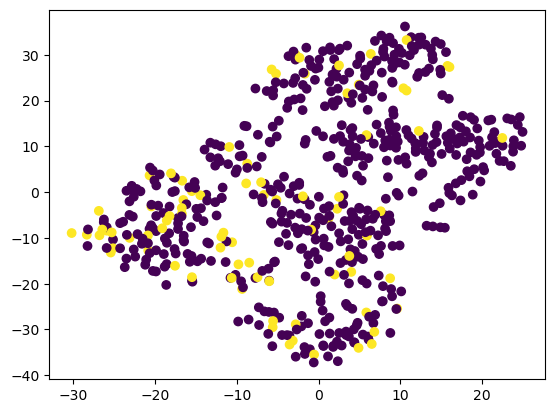

In [72]:
# Results colored by target value
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=y)
plt.show()

<u>**Comments:**</u><br>
The t-SNE plot does not indicate the clustering is seperating myopic from non-mypoic people.

---
# Clustering (30 points)
* A K-means model is created (10 points)
* A for loop is used to create a list of inertias for each k from 1 to 10, inclusive (5 points)
* A plot is created to examine any elbows that exist (10 points)
* States a brief (1-2 sentence) conclusion on whether patients can be clustered together, and supports it with findings (10 points)

In [73]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

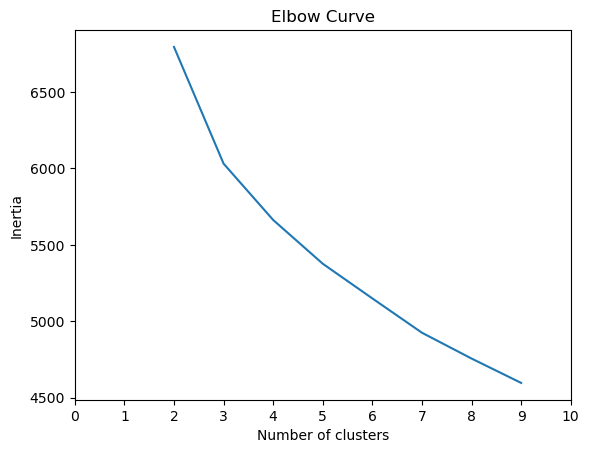

In [74]:
# Finding the best value for k
inertia = []
silhouette = []
calinski = []

# I started my search for k at 2 rather than one becuase the addition checks I add fail with k=1, also k=1 is kind of pointless. 
k = list(range(2, 10)) 

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia_pca)
    # print(km.labels_)
    inertia.append(km.inertia_)
    silhouette.append(silhouette_score(df_myopia_pca, km.labels_))
    calinski.append(calinski_harabasz_score(df_myopia_pca, km.labels_))

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Creating the Elbow Curve
silhouette_data = {"k": k, "silhouette": silhouette}
df_silhouette = pd.DataFrame(silhouette_data)

# Creating the Elbow Curve
calinski_data = {"k": k, "calinski": calinski}
df_calinski = pd.DataFrame(calinski_data)

# elbow method = Within cluster sum of squares distance to the cluster centroid
# alternaitive method is the Calinski-Harabasz Score = ratio of the between-cluster sum of squares and the within cluster sume of squares. Higher scores are better.
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

<u>**Silhouette Analysis**</u><br>
The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).

* The value of the silhouette coefﬁcient is between [-1, 1].
* A score of 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters.
* The worst value is -1. Values near 0 denote overlapping clusters.

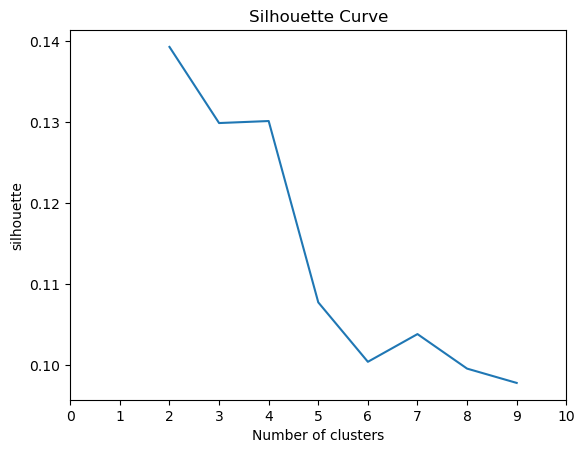

In [75]:
plt.plot(silhouette_data['k'], silhouette_data['silhouette'])
plt.xticks(list(range(11)))
plt.title('Silhouette Curve')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette')
plt.show()

<u>**Calinski-Harabasz Index:**</u><br>
The CH Index (also known as Variance ratio criterion) is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). Higher value of CH index means the clusters are dense and well separated, although there is no “acceptable” cut-off value.

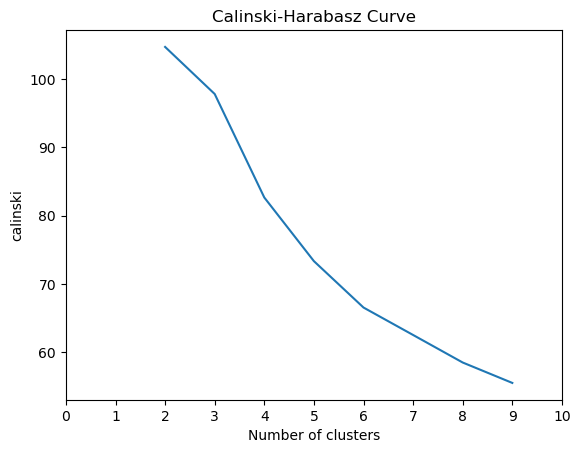

In [76]:
plt.plot(calinski_data['k'], calinski_data['calinski'])
plt.xticks(list(range(11)))
plt.title('Calinski-Harabasz Curve')
plt.xlabel('Number of clusters')
plt.ylabel('calinski')
plt.show()

<u>**Selection of k:**</u><br>
All three tools for analysis of k indicate that k-means is not going to do a good job.  The scores are poor with k=2 and only get worse.

In [77]:
# Number of Clusters
k=2

# Initialize the k-means model
model = KMeans(n_clusters=k, random_state=0)

# Fit the model
model.fit(df_myopia_pca)

# Predict clusters
predictions = model.predict(df_myopia_pca)

# Add the predicted class column to the dataframe
# df_myopia_pca["class"] = model.labels_
# df_myopia_pca.head()

df_myopia_pca["Myopia"] = predictions
df_myopia_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Myopia
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,1
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,1


In [78]:
# size of each cluster
pd.Series(model.labels_).value_counts().sort_index()

0    293
1    325
dtype: int64

In [79]:
model.cluster_centers_

array([[ 1.43361015, -0.09951443, -0.01005253, -0.06337517,  0.04200576,
        -0.00751656,  0.01418363, -0.02685088, -0.00764013, -0.00844542],
       [-1.29245469,  0.08971609,  0.00906274,  0.05713515, -0.03786981,
         0.00677647, -0.01278709,  0.0242071 ,  0.00688787,  0.00761387]])

In [80]:
df_myopia_pca['Myopia'].unique()

array([0, 1])

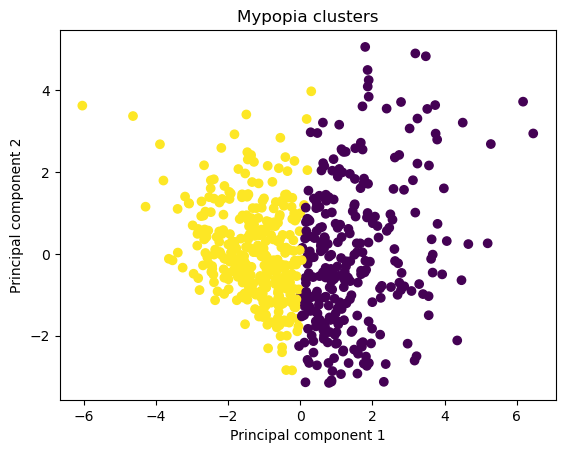

In [81]:
# Visualize the clusters
plt.scatter(x=df_myopia_pca['PC1'], y=df_myopia_pca['PC2'], c=df_myopia_pca['Myopia'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Mypopia clusters')
plt.show()

<AxesSubplot: >

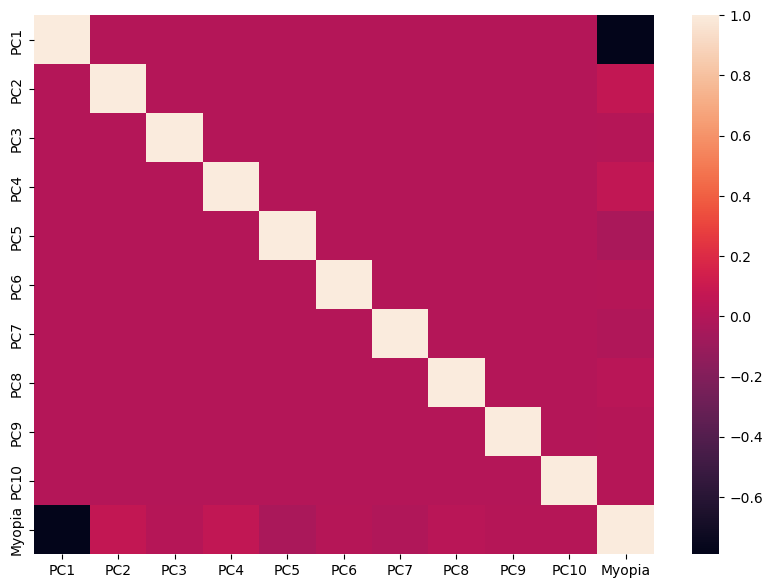

In [82]:
plt.figure(figsize=(10,7))
c= df_myopia_pca.corr()
sns.heatmap(c)

# The correlation heat map below indicates that the principal components are not well separated and that only PC1 is doing a good job separating the clusters.  

In [83]:
df_myopia_pca.pcorr().round(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Myopia
PC1,1.000,0.083,0.011,0.073,-0.051,0.009,-0.019,0.035,0.011,0.012,-0.794
PC2,0.083,1.000,-0.002,-0.010,0.007,-0.001,0.002,-0.005,-0.001,-0.002,0.105
PC3,0.011,-0.002,1.000,-0.001,0.001,-0.000,0.000,-0.001,-0.000,-0.000,0.014
PC4,0.073,-0.010,-0.001,1.000,0.006,-0.001,0.002,-0.004,-0.001,-0.001,0.092
PC5,-0.051,0.007,0.001,0.006,1.000,0.001,-0.001,0.003,0.001,0.001,-0.064
PC6,0.009,-0.001,-0.000,-0.001,0.001,1.000,0.000,-0.001,-0.000,-0.000,0.012
PC7,-0.019,0.002,0.000,0.002,-0.001,0.000,1.000,0.001,0.000,0.000,-0.023
PC8,0.035,-0.005,-0.001,-0.004,0.003,-0.001,0.001,1.000,-0.001,-0.001,0.045
PC9,0.011,-0.001,-0.000,-0.001,0.001,-0.000,0.000,-0.001,1.000,-0.000,0.014
PC10,0.012,-0.002,-0.000,-0.001,0.001,-0.000,0.000,-0.001,-0.000,1.000,0.016


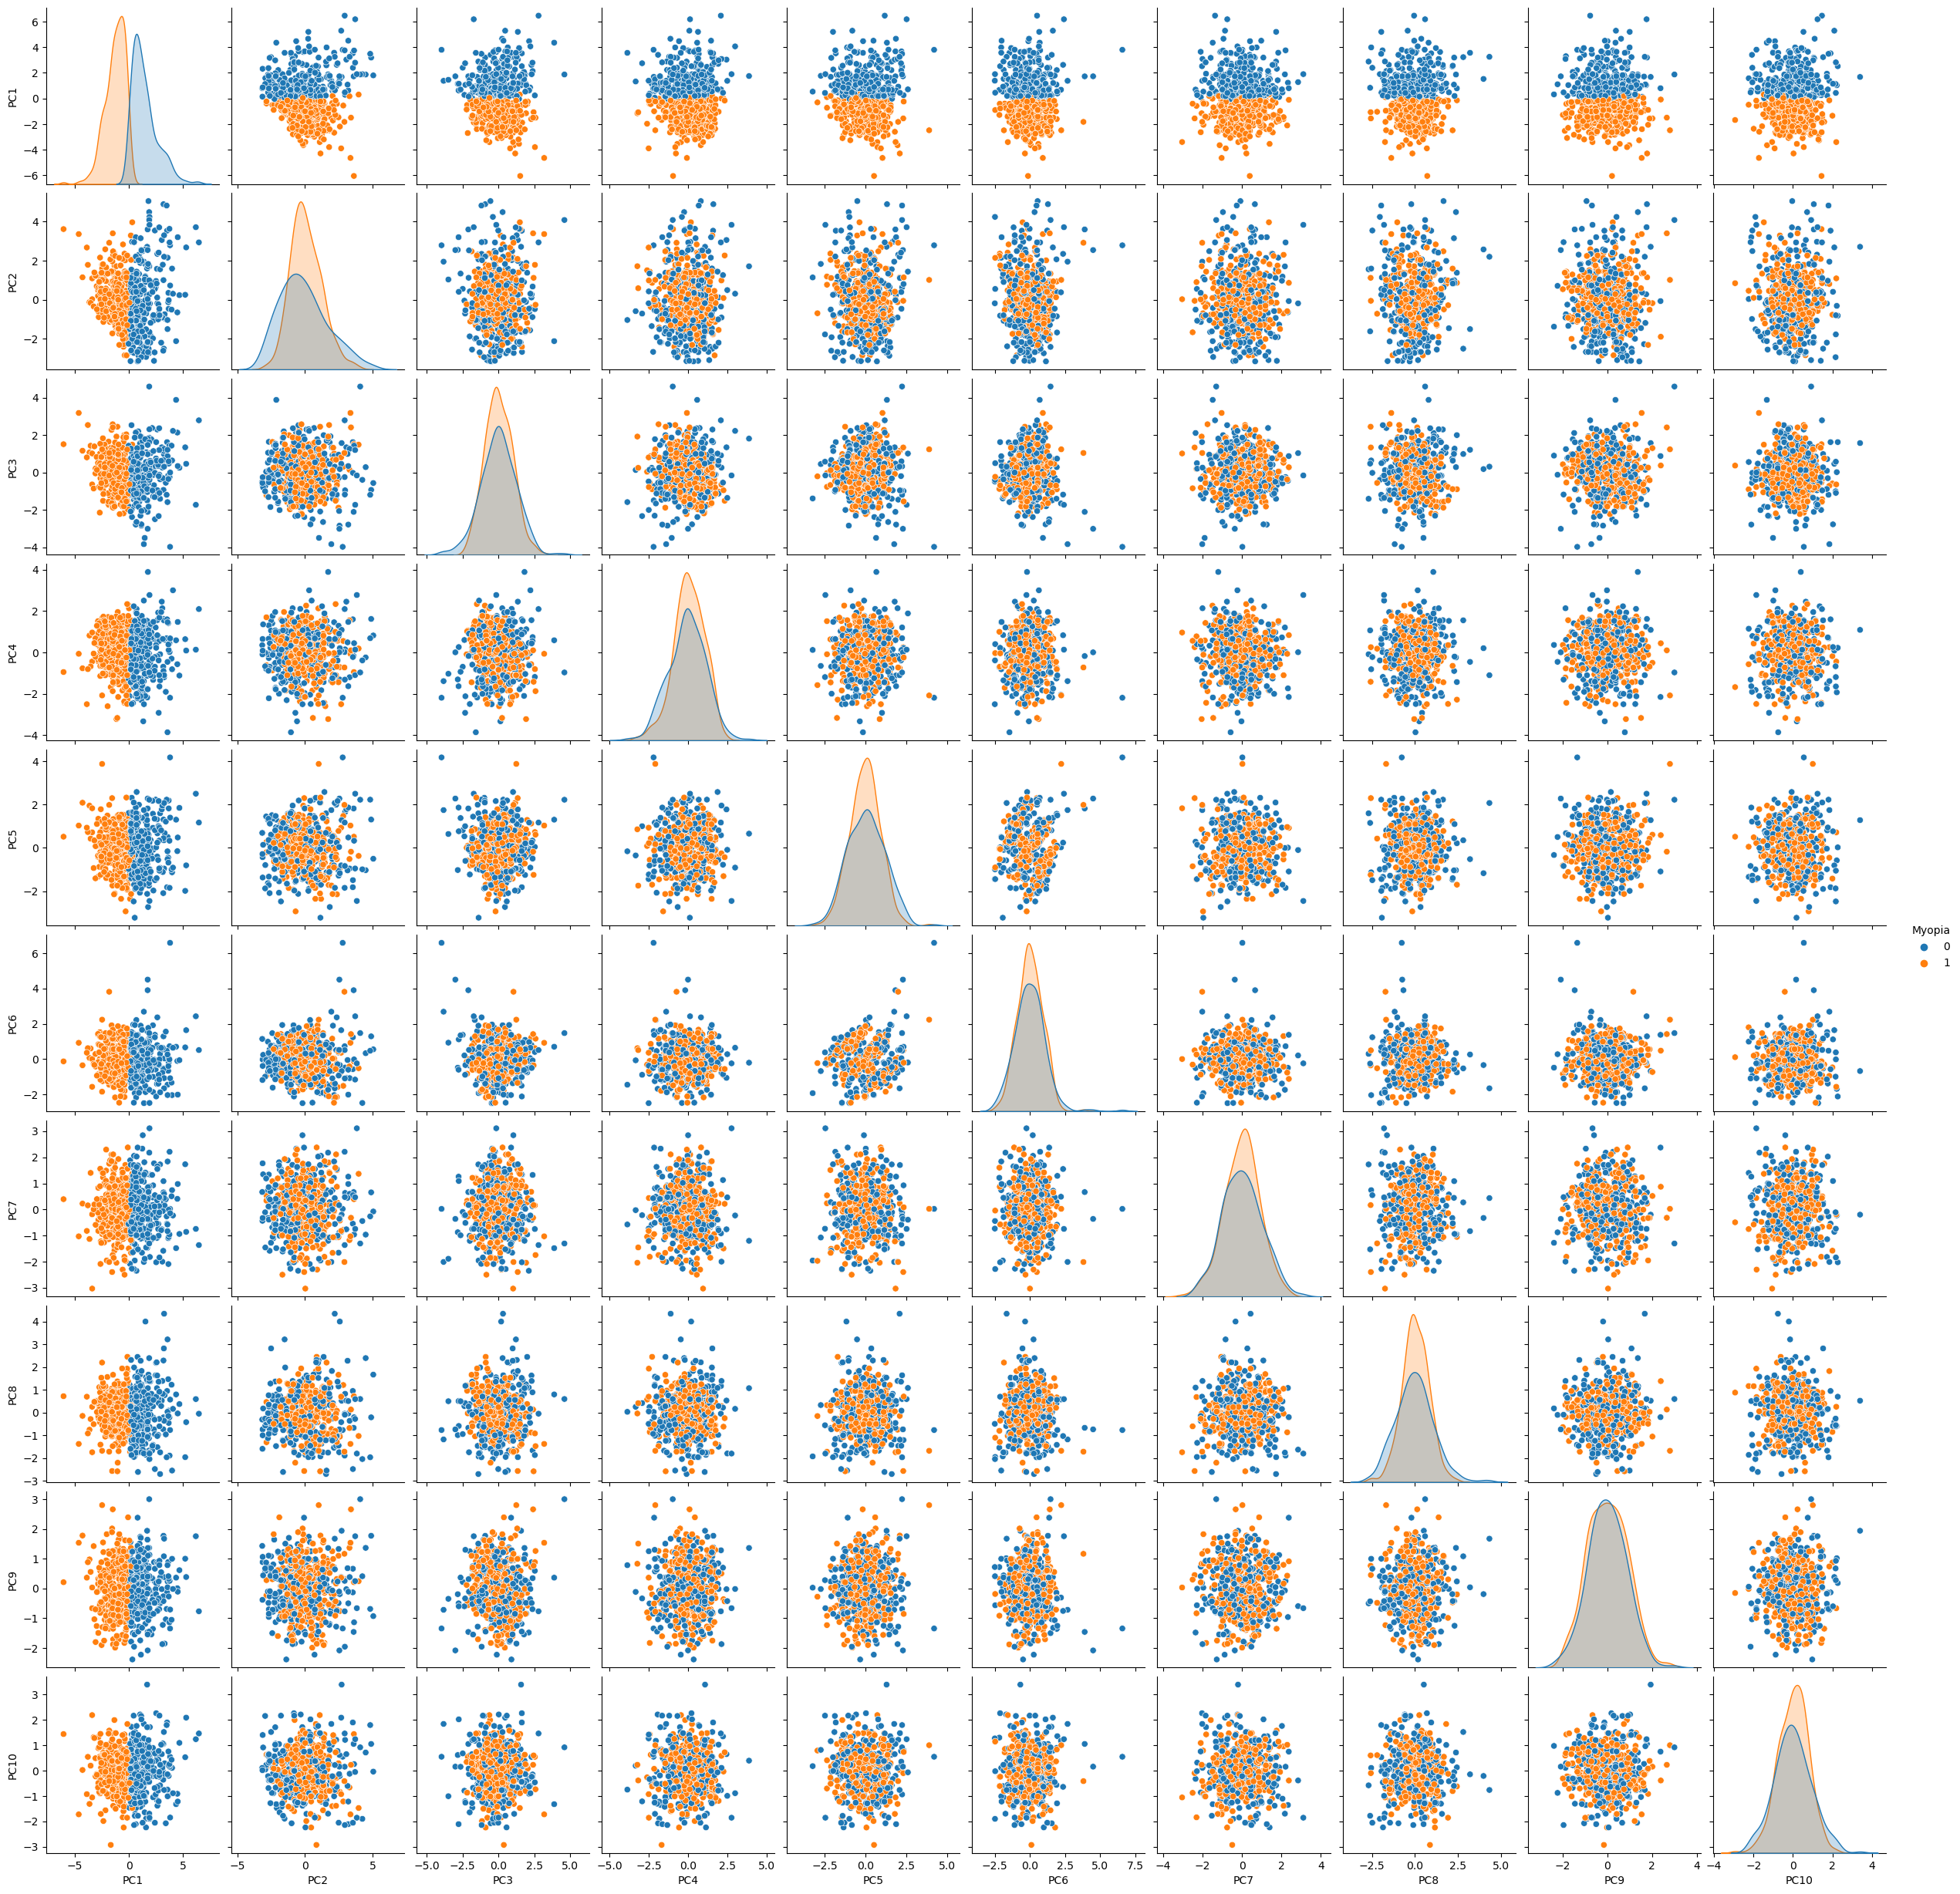

In [84]:

sns.pairplot(df_myopia_pca,hue='Myopia')

# I added scatter plots for each PC with every other PC to investigate further (figure below).  This confirms what the correlation heat map showed;  
# that only PC1 does a good job separating the clusters.

---
# Model Evaluation

In [85]:
# Pearson’s correlation:  Actual vs Model predictions
pg.corr(y, predictions)

,n,r,CI95%,p-val,BF10,power
pearson,618,-0.044143,"[-0.12, 0.03]",0.27321,0.092,0.194951


In [86]:
from sklearn.metrics import confusion_matrix, classification_report
# continue the evaluation of the model
y_true = y

# Predict  - using the model calculate results for the text data
y_pred = predictions

# create and evaluate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()
print(f"True positives (TP): {tp}")
print(f"True negatives (TN): {tn}")
print(f"False positives (FP): {fp}")
print(f"False negatives (FN): {fn}")
precision = (tp / (tp + fp)).round(4)
print(f'precision =  {precision}')
accuracy = ((tp + tn)/(tp+tn+fp+fn)).round(4)
print(f'accuracy =  {accuracy}')
sensitivity = (tp / (tp + fn)).round(4)
print(f'sensitivity =  {sensitivity}')
F1_j = 2*tp/(2*tp+fn+fp)
print(f'F1 = {F1_j}')
print(classification_report(y_true, y_pred))

True positives (TP): 38
True negatives (TN): 250
False positives (FP): 287
False negatives (FN): 43
precision =  0.1169
accuracy =  0.466
sensitivity =  0.4691
F1 = 0.18719211822660098
              precision    recall  f1-score   support

           0       0.85      0.47      0.60       537
           1       0.12      0.47      0.19        81

    accuracy                           0.47       618
   macro avg       0.49      0.47      0.39       618
weighted avg       0.76      0.47      0.55       618



---
# Conclusion
Based on your  findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook. Can the
patients be clustered? If so, into how many clusters?

#### Recomendation:
Whenever we have attempted to analyze the Myopia data, no Machine Learning model has ever been useful at predicting or classifying myopia.  In this attempt, we used Principle Component Analysis in an attempt to reduce the number of variables in the model while retaining much of the variation.  The principal components are also orthogonal.   With this data set to retain 90% of the variation, we needed 10 principal components, nearly equal to the 14 variables we started with. However, the 10 PC are orthogonal so they should yield a model with higher accuracy, at the expense of interpretability.


JSP_Unsupervised_ML.ipynb ---- Model proposed by the homework with using Principal Component Analysis<br>
JSP_Unsup_ML Drop Corr.ipynb  ---- At the start of the analysis locate and drop 3 of 4 variable that are perfectly correlated --> 9 principal components<br>
JSP_Unsup_ML drop corr and PCA.ipynb ---- After removing correlated variables, try eliminating PCA, since it is only going from 11 to 9 variables.<br> 


JSP_Unsupervised_ML.ipynb ---- precision =  0.1169 ---- accuracy =  0.4660<br>
JSP_Unsup_ML Drop Corr.ipynb  ---- precision =  0.1522 ---- accuracy =  0.7136 <br>
JSP_Unsup_ML drop corr and PCA.ipynb ---- precision =  0.1583  ---- accuracy =  0.7152.<br> 


*TThe most useful model is the one that drop correlated variables and does not use PCA.*